---
# Python Course - Practical Class 2:
# Scientific Libraries and Data Manipulation
---

## Exercice #1 - Querying Databases

Consider the star Helvetios: 

&rarr; How many $mag_V < $ stars can you find within 1 degree of the star?

In [14]:
from astroquery.simbad import Simbad
import astropy.units as u

# define custom Simbad query
customSimbad = Simbad()
print('default VOTable fields in Simbad API: {}\n'.format(customSimbad.get_votable_fields()))

# Add VoTable fields to custom query Simbad
customSimbad.add_votable_fields('sptype','flux(V)')
print('updated VOTable fields in Simbad API: {}\n'.format(customSimbad.get_votable_fields()))

# query for Helvetios Main Identifier and coordinates
object_table = customSimbad.query_object("Helvetios")
Helvetios_coords = object_table['MAIN_ID','RA','DEC','SP_TYPE', 'FLUX_V']
print(Helvetios_coords, '\n')

# query for region of 1 deg around Helvetios coordinates
region_table = customSimbad.query_region("Helvetios", radius=1. * u.deg)

mask_mag = (region_table["FLUX_V"] < 10 ) 

print(region_table[mask_mag]['MAIN_ID','RA','DEC','SP_TYPE', 'FLUX_V'])


default VOTable fields in Simbad API: ['main_id', 'coordinates']

updated VOTable fields in Simbad API: ['main_id', 'coordinates', 'sptype', 'flux(V)']

 MAIN_ID        RA           DEC      SP_TYPE FLUX_V
             "h:m:s"       "d:m:s"             mag  
--------- ------------- ------------- ------- ------
*  51 Peg 22 57 27.9804 +20 46 07.782    G2IV   5.46 

    MAIN_ID           RA           DEC      SP_TYPE FLUX_V
                   "h:m:s"       "d:m:s"             mag  
--------------- ------------- ------------- ------- ------
      *  51 Peg 22 57 27.9804 +20 46 07.782    G2IV   5.46
      HD 217116 22 58 07.9632 +20 44 33.313      K0   8.15
  TYC 1717-30-1 22 58 00.9166 +20 31 27.725     F9V   9.85
    BD+20  5251 22 57 12.7494 +21 06 32.720      G5   9.57
    BD+19  5033 22 56 21.8469 +20 31 01.015      F5   9.69
      HD 217317 22 59 42.6280 +20 37 15.471      F0   9.23
      HD 217385 23 00 03.7906 +21 13 10.573      F2   7.64
    V* V338 Peg 22 58 06.4171 +21 30 47.434

&rarr; How many of these stars are of the $G$ spectral type?

In [15]:
mask_sp = ([True  if 'G' in pos else False for pos in region_table[mask_mag]["SP_TYPE"] ])

print (region_table[mask_mag]['MAIN_ID','RA','DEC','SP_TYPE', 'FLUX_V'][mask_sp])

   MAIN_ID           RA           DEC      SP_TYPE FLUX_V
                  "h:m:s"       "d:m:s"             mag  
-------------- ------------- ------------- ------- ------
     *  51 Peg 22 57 27.9804 +20 46 07.782    G2IV   5.46
   BD+20  5251 22 57 12.7494 +21 06 32.720      G5   9.57
   BD+19  5029 22 54 20.8186 +20 29 12.119      G5   9.08
TYC 1714-134-1 22 57 33.5858 +19 52 21.661     G1V   9.67


&rarr; are there any ESPRESSO@VLT observations of Helvetios in 2019?

In [16]:
from astroquery.eso import Eso

# creating ESO query
eso = Eso()
eso.login("jhumberto", store_password=True) 

# Check accepted instrument query parameters
# eso.query_instrument('espresso', help=True)

results = eso.query_instrument('espresso', column_filters={'target':'Helvetios','resolver':'simbad','stime':'2019-01-01', 'etime':'2019-12-31'})

print (results)

INFO: Authenticating jhumberto on www.eso.org... [astroquery.eso.core]
INFO: Authentication successful! [astroquery.eso.core]
None


--- 
## Exercice #2 - Data fitting

Consider the data from file `class2_prat_data.txt`. Using the Numpy/Scipy libraries:

&rarr; load the data from the file and assign the first column to an array X e the second to an array Y.

In [17]:
import numpy as np


# load data from file
X,Y = np.genfromtxt('./class2_prat_data.txt',unpack = True)

&rarr; fit a linear function to the data.

In [18]:
from scipy.optimize import curve_fit

# define linear function
def linear(x, a, b):
    '''
    linear function of the form y = a * x + b
    '''
    return a * x + b
    
params_lin, params_lin_cov = curve_fit(linear, X, Y)
print("a =", params_lin[0])
print("b =", params_lin[1])


a = -0.07058112614282641
b = 0.21583234322938116


&rarr; fit a quadratic function to the data.

In [19]:
# define quadratic function
def quadratic(x, a, b, c):
    '''
    quadratic function of the form y = a * x^2 + b * x + c
    '''
    return a * x**2 + b * x + c
    
params_quad, params_quad_cov = curve_fit(quadratic, X, Y)
print("a =", params_quad[0])
print("b =", params_quad[1])
print("b =", params_quad[2])

a = 0.005242956369312046
b = -0.07058110298484199
b = 0.03393384316547876


&rarr; fit a sinusoidal function to the data.

In [20]:
# define sinusoidal function
def sinusoidal(x, A, B, w, phi):
    '''
    sinusoidal function of the form y = A * sin(w * x + phi) + B
    '''
    return A * np.sin(w * x + phi) + B
    
params_sinus, params_sinus_cov = curve_fit(sinusoidal, X, Y, p0 = [3., 1., 1., 3.14/8.], bounds = ([2, 0.,0.,0.],[10.,5., 5.0,3.14*2]))
print("A =", params_sinus[0])
print("B =", params_sinus[1])
print("w =", params_sinus[2])
print("phi =", params_sinus[3])

A = 3.1698457512430016
B = 0.10203925763717421
w = 1.484018691343565
phi = 1.5737405082073326


&rarr; which function fits better the data? (you can plot the data and the fits, see below)

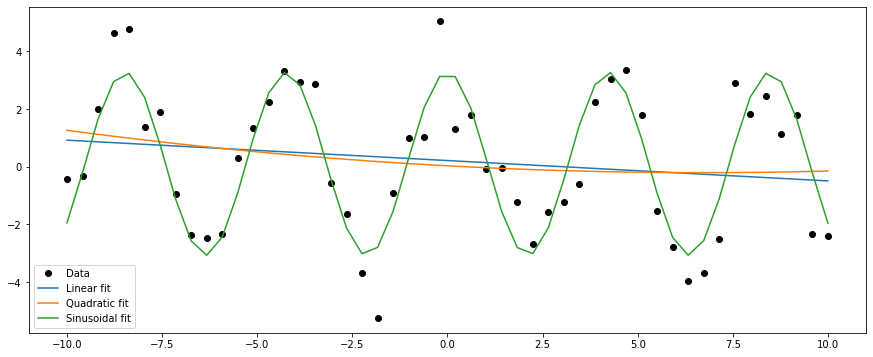

In [21]:
import matplotlib.pyplot as mplt 

# plot data
mplt.figure(figsize=(15,6))
mplt.plot(X,Y,marker = 'o', color = 'k', linestyle = 'None',label = 'Data')

# plot linear fit
mplt.plot(X,linear(X, params_lin[0], params_lin[1]),label = 'Linear fit')

# plot quadratic fit
mplt.plot(X,quadratic(X, params_quad[0], params_quad[1], params_quad[2]),label = 'Quadratic fit')

# plot sinusoidal fit
mplt.plot(X,sinusoidal(X, params_sinus[0], params_sinus[1], params_sinus[2], params_sinus[3]),label = 'Sinusoidal fit')

mplt.legend()

--- 
## Exercice # 3 - Array/Matrix operations

&rarr; Create an array A with 4 x 4 elements, and shuffle its values.

In [22]:
# create A
A = np.empty((4,4))
print(A,'\n')

# flatten A
A = A.flatten()
print (A,'\n')

# shuffle A
np.random.shuffle (A)

# reshape A
A = A.reshape(4,4)
print (A,'\n')

[[ 9.8125   72.90625  19.671875 72.90625 ]
 [19.671875  8.296875 55.171875  8.296875]
 [55.171875  0.        9.8125    0.      ]
 [ 9.8125   72.90625   0.        0.      ]] 

[ 9.8125   72.90625  19.671875 72.90625  19.671875  8.296875 55.171875
  8.296875 55.171875  0.        9.8125    0.        9.8125   72.90625
  0.        0.      ] 

[[ 8.296875  9.8125   19.671875 55.171875]
 [ 0.       55.171875 72.90625   0.      ]
 [ 8.296875 72.90625  19.671875  9.8125  ]
 [ 0.        9.8125    0.       72.90625 ]] 



&rarr; Create an array B with 2 x 4 elements, with all values set to one.

In [23]:
# create B
B = np.ones((2,4))
print(B)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]



&rarr; Create an array C with 4 x 2 elements, with arbitrary values and transpose it.

In [24]:
# create C
C = np.arange(8).reshape(4,2)
print(C,'\n')

# transpose C
print(C.T,'\n')

[[0 1]
 [2 3]
 [4 5]
 [6 7]] 

[[0 2 4 6]
 [1 3 5 7]] 





&rarr; Concatenate array B with the transposed of C into array D.

In [25]:
# create D
D = np.concatenate((B,C.T))
print(D)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [0. 2. 4. 6.]
 [1. 3. 5. 7.]]




&rarr; Compute the cross-product of array D with array A and store it into array E.

In [26]:
# create E
E = np.cross(D,A)
print(E)

ValueError: incompatible dimensions for cross product
(dimension must be 2 or 3)

**This is not possible!**

As per the definition of np.cross:

```
The cross product of a and b in R^3 is a vector perpendicular to both a and b. 
If a and b are arrays of vectors, the vectors are defined by the last axis of 
a and b by default, and these axes can have dimensions 2 or 3. Where the 
dimension of either a or b is 2, the third component of the input vector is 
assumed to be zero and the cross product calculated accordingly. In cases 
where both input vectors have dimension 2, the z-component of the cross product is returned.
```
Thus, we cannot compute the cross product of D and A


&rarr; Calculate the median, mean and standard deviation values of array E

Since E cannot be computed we will use D instead:

In [27]:
# median
print('{:24s} = {:>6.3f}'.format('np.nanmedian(D)',np.nanmedian(D)))
# mean
print('{:24s} = {:>6.3f}'.format('np.nanmean(D)',np.nanmean(D)))
# standart deviation
print('{:24s} = {:>6.3f}'.format('np.nanstd(D)',np.nanstd(D)))

np.nanmedian(D)          =  1.000
np.nanmean(D)            =  2.250
np.nanstd(D)             =  2.046


---
## Exercice #4 - Median Filter

&rarr; Using the Numpy/Scipy/Astropy libraries, replicate the Median Filter exercice from the first practical class of the course

&rarr; Compare the runtime of both methods (base Python vs Numpy/Scipy/Astropy libraries)

TIP: 
to compute the runtime for each method you can use:

```
from time import process_time       # for timing

start = process_time()

DO SOMETHING

end = process_time()

runtime = end_py - start_py
```



In [28]:
# using base python:
from time import process_time
from statistics import median 
from astropy.io import fits 


# Function definition
def load_data():
    with fits.open('../data/spectra.fits') as hdulist:
        wavelengths = hdulist[1].data
        spectra = hdulist[2].data 

    return wavelengths, spectra.tolist()

def boundary_condition(y_data, index, which, filter_size):
    """
    Applies the selected boundary condition to the y_data 

    Parameters
    ============
    y_data : list 
        The input data 
    index : int
        Index of the leftmost edge of the filter
    which : str 
        Which boundary condition to apply. Options : ['mirror']
    filter_size : int
        Number of points in the median window

    Returns 
    ===========
    new_values : list
        Values that expand the input data to be able to apply the filter 
    """
    if which == 'mirror':
        if index < 0:
            return y_data[1 : abs(index)+1]
        elif index > len(y_data) - filter_size: 
            return y_data[-(index + filter_size - len(y_data)+1) : -1 ]

def median_filter(y_data, filter_size):
    """
    Calculation of the median filter using a sliding window centered in each point. The filter size must be odd, in order to guarantee that there is 
    the same number of points being sampled in each side.


    Parameters
    ============
    y_data : list 
        The input data 
    filter_size : int 
        Number of points in the median window

    Returns 
    ===========
    filtered_values : list
        Computed median filter 
    """

    if filter_size % 2 == 0:
        raise ValueError("Filter size should be odd")
    output = []
    data_size = len(y_data)

    initial_leftmost_edge = -int(filter_size/2)
    
    # start_index is the position of the leftmost edge of the filter
    for start_index in range(initial_leftmost_edge, data_size + initial_leftmost_edge):
        
        if start_index < 0:
            # the leftmost edge is outside the y_data array
            value = median(y_data[0:  filter_size - abs(start_index)] + boundary_condition(y_data, start_index, 'mirror', filter_size=filter_size))
        elif start_index > data_size - filter_size:
            # the rightmost edge is outside the y_data array
            value = median(y_data[start_index:] + boundary_condition(y_data, start_index, 'mirror', filter_size=filter_size))
        else:
            value = median(y_data[start_index : start_index+filter_size])
        output.append(value)

    return output

def process_data():
    wavelengths, spectra = load_data() 
    for index, order in enumerate(spectra):
        continuum_level = median_filter(order, filter_size = 101)

# running the code
start_basePy = process_time()
process_data()
end_basePy = process_time()

print('run time for median filter using base Python: {:.3f}s'.format(end_basePy - start_basePy))

run time for median filter using base Python: 1.825s


In [29]:
# using scientific libraries:
from time import process_time,sleep
from astropy.io import fits 
import numpy as np
import matplotlib.pyplot as mplt

# Function definition
def load_data_np():
    with fits.open('../data/spectra.fits') as hdulist:
        wavelengths = hdulist[1].data
        spectra = hdulist[2].data 

    return wavelengths, spectra

def median_filter_np(y_data, filter_size):
    """
    Calculation of the median filter using a sliding window centered in each point. The filter size must be odd, in order to guarantee that there is 
    the same number of points being sampled in each side.


    Parameters
    ============
    y_data : numpy array 
        The input data 
    filter_size : int 
        Number of points in the median window

    Returns 
    ===========
    filtered_values : numpy array 
        Computed median filter 
    """

    if filter_size % 2 == 0:
        raise ValueError("Filter size should be odd")
    
    data_size = np.shape(y_data)[0]
    
    rolling_slices = np.zeros((data_size,filter_size))

    data_with_bounds = np.concatenate((y_data[:int(filter_size/2)][::-1],y_data,y_data[-int(filter_size/2):]))

    for index,row in enumerate(rolling_slices):
        row[:] = data_with_bounds[index:index + filter_size]

    return np.median(rolling_slices,axis = 1)


def process_data():
    wavelengths, spectra = load_data_np() 
    continuum_level = np.zeros_like(spectra)

    #mplt.figure(figsize = (15,6))         # uncomment line to see plot

    start_basePy = process_time()
    for index, order in enumerate(spectra):
        continuum_level[index] = median_filter_np(order, filter_size = 101)
        #mplt.plot(wavelengths[index], spectra[index], color = 'black')         # uncomment line to see plot
        #mplt.plot(wavelengths[index], continuum_level[index], color = 'red')         # uncomment line to see plot

    end_basePy = process_time()

    print('run time for median filter using numpy: {:.3f}s'.format(end_basePy - start_basePy))


    #mplt.show()         # uncomment line to see plot


# running the code

process_data()

run time for median filter using numpy: 0.724s
